## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [6]:
pop = pd.read_csv('grades.csv')

In [7]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

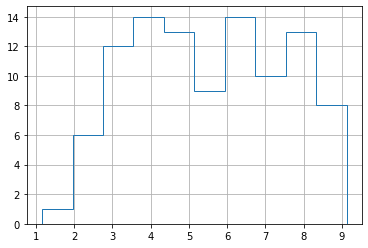

In [8]:
pop.grade.hist(histtype = 'step')

In [9]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [10]:
pop.sample(100,replace = True).describe()

,grade
count,100.000000
mean,5.303360
std,1.942859
min,1.160899
25%,3.707078
50%,5.135857
75%,6.901579
max,8.522332


In [17]:
bootstrap = pd.DataFrame(
    {'meangrade' : [pop.sample(100,replace= True).
     grade.mean() for i in range(1000)]})

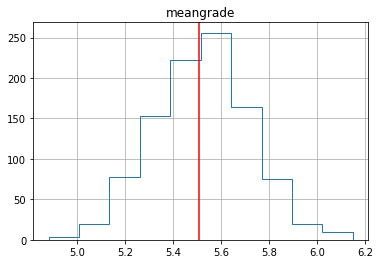

In [19]:
 bootstrap.hist(histtype = 'step')
pp.axvline(pop.grade.mean(),color = 'red')

In [20]:
bootstrap.meangrade.quantile(0.025),bootstrap.meangrade.quantile(0.95)

(5.149012992549837, 5.845804143443948)

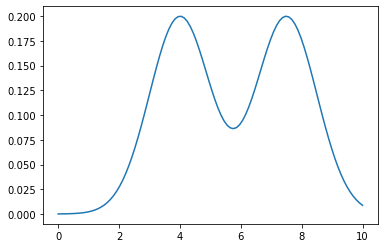

In [26]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5 * n1.pdf(x) + 0.5 * n2.pdf(x))

In [47]:
def dataset(n =100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

In [43]:
def draw():
    while True:
        #rvs:产生服从指定分布的随机数
        v = n1.rvs() if np.random.rand() < 0.5 else n2.res()
        if 0 <= v <= 10:
            return v

In [44]:
for i in range(5):
    dataset(100).grade.hist(histtype = "step",density = True)

NameError: name 'dataset' is not defined